In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as stats
import colourmap
import plotly.express as px
import scipy
import datetime
from scipy import stats
import statsmodels.api as sm
from scipy.stats import skew
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [3]:
pd.options.display.max_columns = 80
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimmin

In [4]:
df.columns = df.columns.str.strip()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

**Les variables à prédire sont la consommation d'énergie du bâtiment (SiteEnergyUse(kBtu)) et l'émissions de CO2 (TotalGHGEmissions)**.

In [6]:
df1=df.copy()
df1=df1.loc[df1['BuildingType']=='NonResidential']
df1

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.50,7.456910e+06,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.00,8.664479e+06,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.00,7.393711e+07,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.00,6.946800e+06,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.00,1.465650e+07,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,50068,2016,NonResidential,Warehouse,Airport - Maintenance Shop - DOT: KCIA,6518 Ellis,Seattle,WA,98108.0,2824049007,2,GREATER DUWAMISH,47.54425,-122.31776,1955,1.0,1,52085,4222,47863,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,52085.0,NaN,NaN,NaN,NaN,NaN,37.0,69.199997,80.300003,102.099998,114.599998,3605855.50,4.182622e+06,0.00,2.147724e+05,732803.0,28730.51953,2873052.0,False,NaN,Compliant,NaN,157.70,3.03
3339,50069,2016,NonResidential,Small- and Mid-Sized Office,Airport - Main Terminal,7277 Perimeter Rd.,Seattle,WA,98108.0,2824049007,2,GREATER DUWAMISH,47.53161,-122.29944,1929,1.0,2,24990,0,24990,Office,Office,24990.0,NaN,NaN,NaN,NaN,NaN,9.0,176.899994,189.300003,367.000000,378.700012,4420650.50,4.731814e+06,0.00,6.351199e+05,2167029.0,22536.21094,2253621.0,False,NaN,Compliant,NaN,134.80,5.39
3340,50070,2016,NonResidential,Other,Tennis Center Sand Point,7135 Sportsfield Drive NE,Seattle,WA,98155.0,0225049062,4,NORTHEAST,47.68109,-122.26180,2013,1.0,1,72000,0,72000,Other - Recreation,Other - Recreation,72000.0,NaN,NaN,NaN,NaN,NaN,NaN,40.599998,44.400002,97.900002,101.800003,2925780.00,3.198858e+

In [7]:
df1=df1.dropna(subset = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'], how='all')
df1

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.50,7.456910e+06,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.00,8.664479e+06,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.00,7.393711e+07,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.00,6.946800e+06,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.00,1.465650e+07,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,50068,2016,NonResidential,Warehouse,Airport - Maintenance Shop - DOT: KCIA,6518 Ellis,Seattle,WA,98108.0,2824049007,2,GREATER DUWAMISH,47.54425,-122.31776,1955,1.0,1,52085,4222,47863,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,52085.0,NaN,NaN,NaN,NaN,NaN,37.0,69.199997,80.300003,102.099998,114.599998,3605855.50,4.182622e+06,0.00,2.147724e+05,732803.0,28730.51953,2873052.0,False,NaN,Compliant,NaN,157.70,3.03
3339,50069,2016,NonResidential,Small- and Mid-Sized Office,Airport - Main Terminal,7277 Perimeter Rd.,Seattle,WA,98108.0,2824049007,2,GREATER DUWAMISH,47.53161,-122.29944,1929,1.0,2,24990,0,24990,Office,Office,24990.0,NaN,NaN,NaN,NaN,NaN,9.0,176.899994,189.300003,367.000000,378.700012,4420650.50,4.731814e+06,0.00,6.351199e+05,2167029.0,22536.21094,2253621.0,False,NaN,Compliant,NaN,134.80,5.39
3340,50070,2016,NonResidential,Other,Tennis Center Sand Point,7135 Sportsfield Drive NE,Seattle,WA,98155.0,0225049062,4,NORTHEAST,47.68109,-122.26180,2013,1.0,1,72000,0,72000,Other - Recreation,Other - Recreation,72000.0,NaN,NaN,NaN,NaN,NaN,NaN,40.599998,44.400002,97.900002,101.800003,2925780.00,3.198858e+

In [8]:
df1.Neighborhood.unique()

array(['DOWNTOWN', 'NORTHEAST', 'EAST', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'MAGNOLIA / QUEEN ANNE', 'CENTRAL',
       'SOUTHWEST', 'SOUTHEAST', 'NORTH', 'DELRIDGE', 'North', 'Delridge',
       'Ballard', 'Northwest', 'Central'], dtype=object)

In [9]:
df1.Neighborhood = df1.Neighborhood.str.upper()

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 3356
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1458 non-null   int64  
 1   DataYear                         1458 non-null   int64  
 2   BuildingType                     1458 non-null   object 
 3   PrimaryPropertyType              1458 non-null   object 
 4   PropertyName                     1458 non-null   object 
 5   Address                          1458 non-null   object 
 6   City                             1458 non-null   object 
 7   State                            1458 non-null   object 
 8   ZipCode                          1458 non-null   float64
 9   TaxParcelIdentificationNumber    1458 non-null   object 
 10  CouncilDistrictCode              1458 non-null   int64  
 11  Neighborhood                     1458 non-null   object 
 12  Latitude            

**GARDER JUSTE LES BATIMENTS QUI SATISFAIENT LES EXIGENCES DES ANALYSES**

In [11]:
df1.ComplianceStatus.unique()

array(['Compliant', 'Non-Compliant', 'Error - Correct Default Data',
       'Missing Data'], dtype=object)

In [12]:
df1=df1.loc[df1.ComplianceStatus=='Compliant']
df1

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.50,7.456910e+06,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.00,8.664479e+06,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.00,7.393711e+07,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.00,6.946800e+06,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.00,1.465650e+07,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,50068,2016,NonResidential,Warehouse,Airport - Maintenance Shop - DOT: KCIA,6518 Ellis,Seattle,WA,98108.0,2824049007,2,GREATER DUWAMISH,47.54425,-122.31776,1955,1.0,1,52085,4222,47863,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,52085.0,NaN,NaN,NaN,NaN,NaN,37.0,69.199997,80.300003,102.099998,114.599998,3605855.50,4.182622e+06,0.00,2.147724e+05,732803.0,28730.51953,2873052.0,False,NaN,Compliant,NaN,157.70,3.03
3339,50069,2016,NonResidential,Small- and Mid-Sized Office,Airport - Main Terminal,7277 Perimeter Rd.,Seattle,WA,98108.0,2824049007,2,GREATER DUWAMISH,47.53161,-122.29944,1929,1.0,2,24990,0,24990,Office,Office,24990.0,NaN,NaN,NaN,NaN,NaN,9.0,176.899994,189.300003,367.000000,378.700012,4420650.50,4.731814e+06,0.00,6.351199e+05,2167029.0,22536.21094,2253621.0,False,NaN,Compliant,NaN,134.80,5.39
3340,50070,2016,NonResidential,Other,Tennis Center Sand Point,7135 Sportsfield Drive NE,Seattle,WA,98155.0,0225049062,4,NORTHEAST,47.68109,-122.26180,2013,1.0,1,72000,0,72000,Other - Recreation,Other - Recreation,72000.0,NaN,NaN,NaN,NaN,NaN,NaN,40.599998,44.400002,97.900002,101.800003,2925780.00,3.198858e+

In [13]:
df1['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'University',
       'Small- and Mid-Sized Office', 'Self-Storage Facility',
       'Warehouse', 'K-12 School', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Worship Facility',
       'Supermarket / Grocery Store', 'Distribution Center', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Low-Rise Multifamily'],
      dtype=object)

In [14]:
pourcentage_NaN = df1.isnull().mean() * 100
pourcentage_NaN 

OSEBuildingID                        0.000000
DataYear                             0.000000
BuildingType                         0.000000
PrimaryPropertyType                  0.000000
PropertyName                         0.000000
Address                              0.000000
City                                 0.000000
State                                0.000000
ZipCode                              0.000000
TaxParcelIdentificationNumber        0.000000
CouncilDistrictCode                  0.000000
Neighborhood                         0.000000
Latitude                             0.000000
Longitude                            0.000000
YearBuilt                            0.000000
NumberofBuildings                    0.000000
NumberofFloors                       0.000000
PropertyGFATotal                     0.000000
PropertyGFAParking                   0.000000
PropertyGFABuilding(s)               0.000000
ListOfAllPropertyUseTypes            0.000000
LargestPropertyUseType            

In [15]:
df1=df1.drop(df1.columns[df1.isnull().mean()>=0.70], axis=1)
df1

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.50,7.456910e+06,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.00,8.664479e+06,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.00,7.393711e+07,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.00,6.946800e+06,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.00,1.465650e+07,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,50068,2016,NonResidential,Warehouse,Airport - Maintenance Shop - DOT: KCIA,6518 Ellis,Seattle,WA,98108.0,2824049007,2,GREATER DUWAMISH,47.54425,-122.31776,1955,1.0,1,52085,4222,47863,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,52085.0,NaN,NaN,37.0,69.199997,80.300003,102.099998,114.599998,3605855.50,4.182622e+06,0.00,2.147724e+05,732803.0,28730.51953,2873052.0,False,Compliant,157.70,3.03
3339,50069,2016,NonResidential,Small- and Mid-Sized Office,Airport - Main Terminal,7277 Perimeter Rd.,Seattle,WA,98108.0,2824049007,2,GREATER DUWAMISH,47.53161,-122.29944,1929,1.0,2,24990,0,24990,Office,Office,24990.0,NaN,NaN,9.0,176.899994,189.300003,367.000000,378.700012,4420650.50,4.731814e+06,0.00,6.351199e+05,2167029.0,22536.21094,2253621.0,False,Compliant,134.80,5.39
3340,50070,2016,NonResidential,Other,Tennis Center Sand Point,7135 Sportsfield Drive NE,Seattle,WA,98155.0,0225049062,4,NORTHEAST,47.68109,-122.26180,2013,1.0,1,72000,0,72000,Other - Recreation,Other - Recreation,72000.0,NaN,NaN,NaN,40.599998,44.400002,97.900002,101.800003,2925780.00,3.198858e+06,0.00,5.573329e+05,1901620.0,10241.59961,1024160.0,False,Compliant,67.65,0.94
3347,50081,2016,NonResidential,K-12 School,Hamlin Robinson School,1701 20th Ave South,Seattle,WA,98144.0,7548300840,3,GREATER DUWAMISH,47.58831,-122.30650,2015,1.0,3,45000,0,45000,"K-12 School, Parking",K-12 Schoo

**CHOIX DES VARIABLES**

In [16]:
df1.duplicated().sum()

0

In [17]:
from dateutil.relativedelta import relativedelta
df1['YearBuilt'] = pd.to_datetime(df1['YearBuilt'], format='%Y')
today = datetime.datetime.today()
df1['BuildingAge'] = df1['YearBuilt'].apply(lambda x: relativedelta(today, x).years)

df1

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927-01-01,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.50,7.456910e+06,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,249.98,2.83,96
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996-01-01,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.00,8.664479e+06,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,295.86,2.86,27
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969-01-01,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.00,7.393711e+07,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,2089.28,2.19,54
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926-01-01,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.00,6.946800e+06,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,286.43,4.67,97
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980-01-01,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.00,1.465650e+07,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,505.01,2.88,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,50068,2016,NonResidential,Warehouse,Airport - Maintenance Shop - DOT: KCIA,6518 Ellis,Seattle,WA,98108.0,2824049007,2,GREATER DUWAMISH,47.54425,-122.31776,1955-01-01,1.0,1,52085,4222,47863,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,52085.0,NaN,NaN,37.0,69.199997,80.300003,102.099998,114.599998,3605855.50,4.182622e+06,0.00,2.147724e+05,732803.0,28730.51953,2873052.0,False,Compliant,157.70,3.03,68
3339,50069,2016,NonResidential,Small- and Mid-Sized Office,Airport - Main Terminal,7277 Perimeter Rd.,Seattle,WA,98108.0,2824049007,2,GREATER DUWAMISH,47.53161,-122.29944,1929-01-01,1.0,2,24990,0,24990,Office,Office,24990.0,NaN,NaN,9.0,176.899994,189.300003,367.000000,378.700012,4420650.50,4.731814e+06,0.00,6.351199e+05,2167029.0,22536.21094,2253621.0,False,Compliant,134.80,5.39,94
3340,50070,2016,NonResidential,Other,Tennis Center Sand Point,7135 Sportsfield Drive NE,Seattle,WA,98155.0,0225049062,4,NORTHEAST,47.68109,-122.26180,2013-01-01,1.0,1,72000,0,72000,Other - Recreation,Other - Recreation,72000.0,NaN,NaN,NaN,40.599998,44.400002,97.900002,101.800003,2925780.00,3.198858e+06,0.00,5.573329e+05,1901620.0,10241.59961,1024160.0,False,Compliant,67.65,0.94,10
3347,50081,2016,NonResidential,K-12 School,Hamlin Robinson School,1701 20th Ave South,Seattle,WA,98144.0,7548300840,3,GREATER

In [18]:
for index, column in enumerate(df1.columns):
    print(f"Index: {index}, Column: {column}")

Index: 0, Column: OSEBuildingID
Index: 1, Column: DataYear
Index: 2, Column: BuildingType
Index: 3, Column: PrimaryPropertyType
Index: 4, Column: PropertyName
Index: 5, Column: Address
Index: 6, Column: City
Index: 7, Column: State
Index: 8, Column: ZipCode
Index: 9, Column: TaxParcelIdentificationNumber
Index: 10, Column: CouncilDistrictCode
Index: 11, Column: Neighborhood
Index: 12, Column: Latitude
Index: 13, Column: Longitude
Index: 14, Column: YearBuilt
Index: 15, Column: NumberofBuildings
Index: 16, Column: NumberofFloors
Index: 17, Column: PropertyGFATotal
Index: 18, Column: PropertyGFAParking
Index: 19, Column: PropertyGFABuilding(s)
Index: 20, Column: ListOfAllPropertyUseTypes
Index: 21, Column: LargestPropertyUseType
Index: 22, Column: LargestPropertyUseTypeGFA
Index: 23, Column: SecondLargestPropertyUseType
Index: 24, Column: SecondLargestPropertyUseTypeGFA
Index: 25, Column: ENERGYSTARScore
Index: 26, Column: SiteEUI(kBtu/sf)
Index: 27, Column: SiteEUIWN(kBtu/sf)
Index: 28,

In [19]:
df1=df1.iloc[:, [2,3,11,15,16,17,25,30,32,34,36,39,41]]
df1.head(2)

,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingAge
0,NonResidential,Hotel,DOWNTOWN,1.0,12,88434,60.0,7226362.5,2003882.0,3946027.0,1276453.0,249.98,96
1,NonResidential,Hotel,DOWNTOWN,1.0,11,103566,61.0,8387933.0,0.0,3242851.0,5145082.0,295.86,27


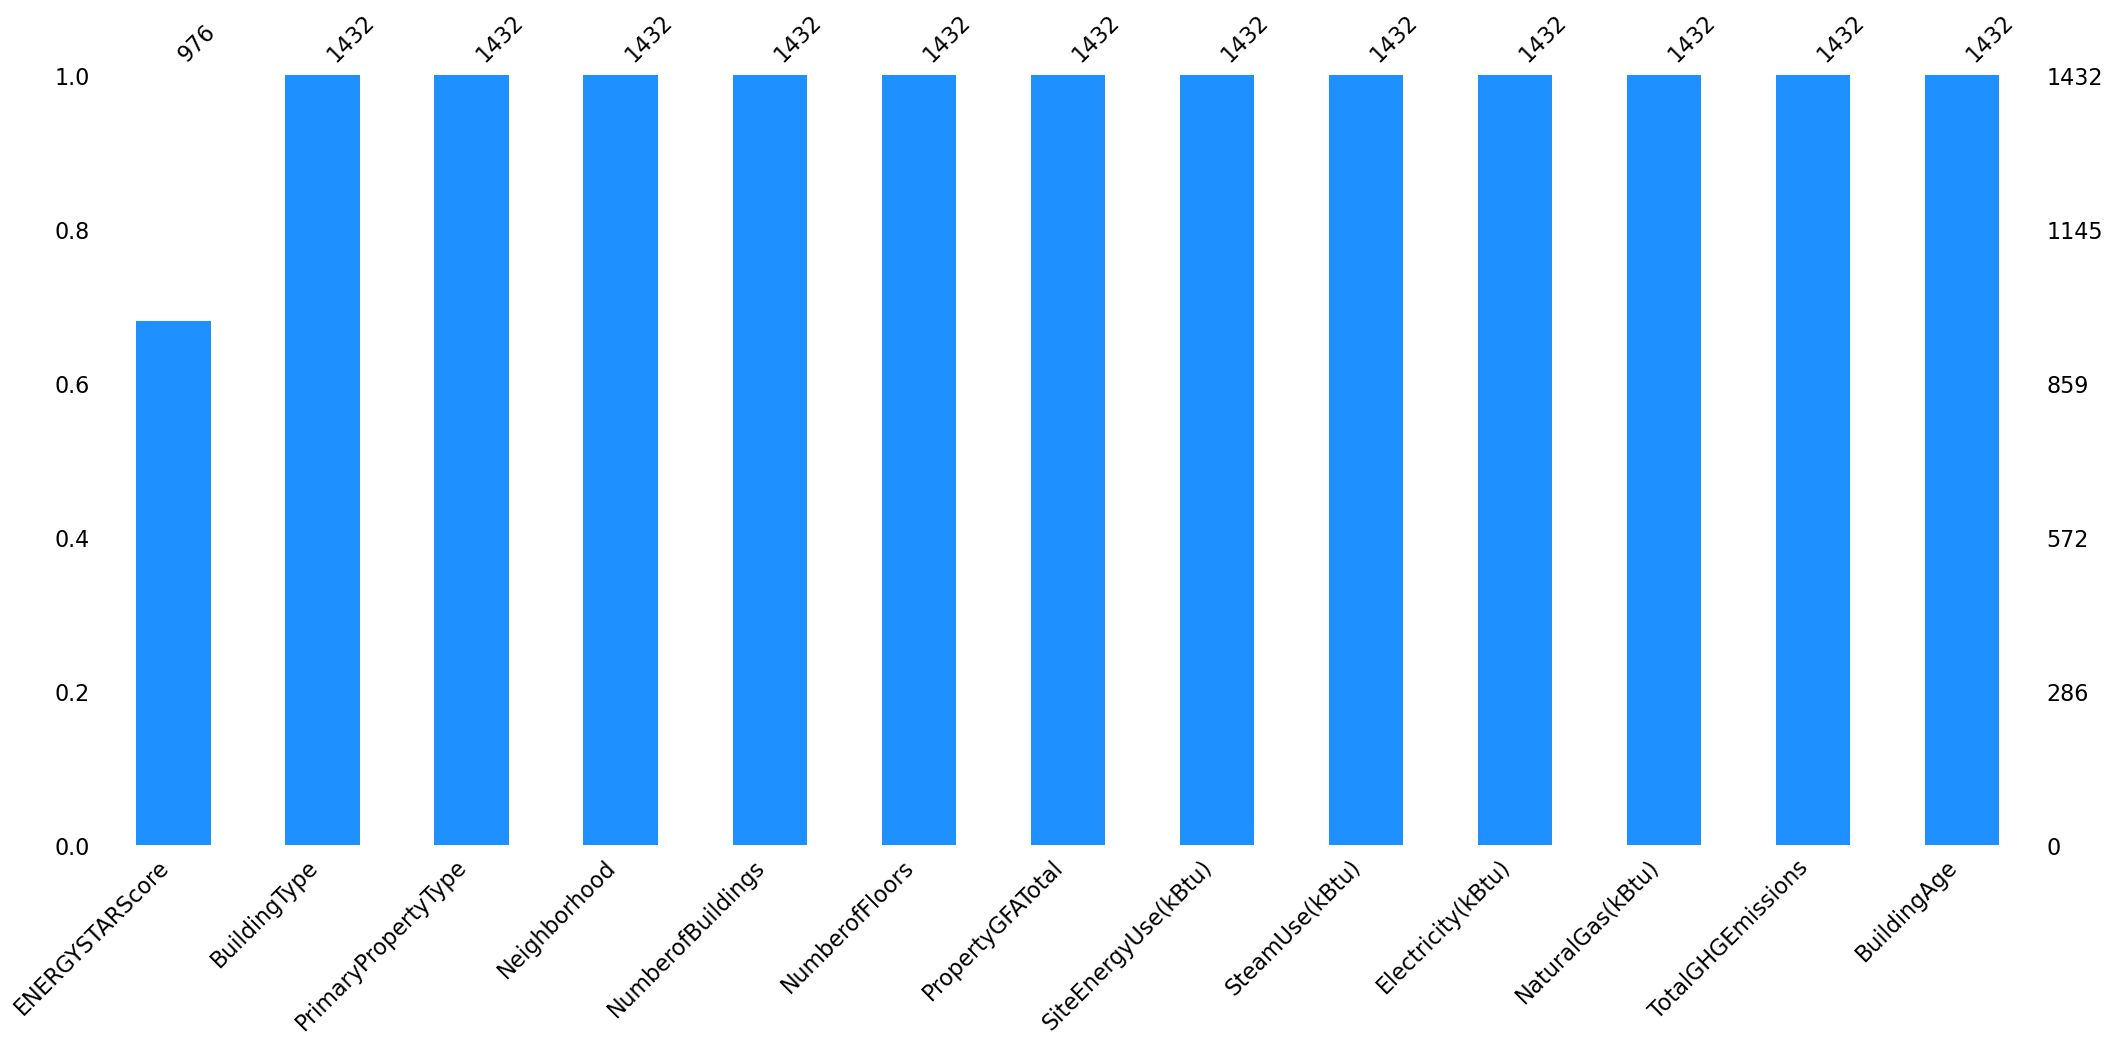

In [20]:
msno.bar(df1,color="dodgerblue", sort="ascending" );

In [21]:
df1['ENERGYSTARScore'].isna().sum()

456

In [22]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
NumberofBuildings,1432.0,1.032123e+00,5.356099e-01,0.00000,1.000000e+00,1.00,1.000,9.000000e+00
NumberofFloors,1432.0,4.402235e+00,6.821284e+00,0.00000,1.000000e+00,3.00,5.000,9.900000e+01
PropertyGFATotal,1432.0,1.132641e+05,1.909507e+05,16300.00000,2.937000e+04,48125.50,104854.750,1.952220e+06
ENERGYSTARScore,976.0,6.348053e+01,2.879159e+01,1.00000,4.375000e+01,70.00,88.000,1.000000e+02
SiteEnergyUse(kBtu),1432.0,7.814269e+06,1.921578e+07,57133.19922,1.219834e+06,2650597.50,6968646.375,2.930908e+08
SteamUse(kBtu),1432.0,5.083826e+05,5.497471e+06,0.00000,0.000000e+00,0.00,0.000,1.349435e+08
Electricity(kBtu),1432.0,5.555264e+06,1.335426e+07,-115417.00000,7.200730e+05,1711462.00,5143689.500,2.745325e+08
NaturalGas(kBtu),1432.0,1.709228e+06,5.693273e+06,0.00000,0.000000e+00,442087.00,1399704.750,1.381912e+08
TotalGHGEmissions,1432.0,1.687461e+02,5.910355e+02,-0.80000,1.976000e+01,48.24,134.600,1.230716e+04
BuildingAge,1432.0,6.185824e+01,3.286544e+01,8.00000,3.500000e+01,58.00,94.000,1.230000e+02


In [23]:
df1 = df1[(df1['Electricity(kBtu)']>0) & (df1['TotalGHGEmissions']>0)]
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
NumberofBuildings,1429.0,1.032190e+00,5.361702e-01,0.00000,1.000,1.00,1.00,9.000000e+00
NumberofFloors,1429.0,4.405878e+00,6.827127e+00,0.00000,1.000,3.00,5.00,9.900000e+01
PropertyGFATotal,1429.0,1.133949e+05,1.911297e+05,16300.00000,29340.000,48112.00,105061.00,1.952220e+06
ENERGYSTARScore,974.0,6.347639e+01,2.877854e+01,1.00000,44.000,70.00,88.00,1.000000e+02
SiteEnergyUse(kBtu),1429.0,7.813616e+06,1.923428e+07,57133.19922,1219863.125,2646879.00,6962073.00,2.930908e+08
SteamUse(kBtu),1429.0,5.094499e+05,5.503193e+06,0.00000,0.000,0.00,0.00,1.349435e+08
Electricity(kBtu),1429.0,5.567007e+06,1.336582e+07,3.00000,722467.000,1738749.00,5169641.00,2.745325e+08
NaturalGas(kBtu),1429.0,1.704764e+06,5.692987e+06,0.00000,0.000,443988.00,1397303.00,1.381912e+08
TotalGHGEmissions,1429.0,1.686732e+02,5.915062e+02,0.40000,19.810,48.35,134.57,1.230716e+04
BuildingAge,1429.0,6.188453e+01,3.280803e+01,8.00000,35.000,58.00,94.00,1.230000e+02


In [24]:
X = df1.select_dtypes(include='number')
df_zscore = X.apply(lambda x: (x - x.mean()) / x.std())
seuil = 3
df2 = df1[(np.abs(df_zscore) < seuil).all(axis=1)]
df2

,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingAge
0,NonResidential,Hotel,DOWNTOWN,1.0,12,88434,60.0,7226362.50,2003882.00,3946027.0,1276453.0,249.98,96
1,NonResidential,Hotel,DOWNTOWN,1.0,11,103566,61.0,8387933.00,0.00,3242851.0,5145082.0,295.86,27
3,NonResidential,Hotel,DOWNTOWN,1.0,10,61320,56.0,6794584.00,2214446.25,2768924.0,1811213.0,286.43,97
4,NonResidential,Hotel,DOWNTOWN,1.0,18,175580,75.0,14172606.00,0.00,5368607.0,8803998.0,505.01,43
6,NonResidential,Hotel,DOWNTOWN,1.0,11,83008,27.0,5758795.00,0.00,2811215.0,2947580.0,176.14,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324,NonResidential,Large Office,LAKE UNION,1.0,12,483397,98.0,13998638.00,0.00,11733018.0,2265619.0,202.12,8
3337,NonResidential,Hotel,LAKE UNION,1.0,4,126823,72.0,6042399.50,0.00,4115620.0,1926779.0,131.02,9
3338,NonResidential,Warehouse,GREATER DUWAMISH,1.0,1,52085,37.0,3605855.50,0.00,732803.0,2873052.0,157.70,68
3339,NonResidential,Small- and Mid-Sized Office,GREATER DUWAMISH,1.0,2,24990,9.0,4420650.50,0.00,2167029.0,2253621.0,134.80,94


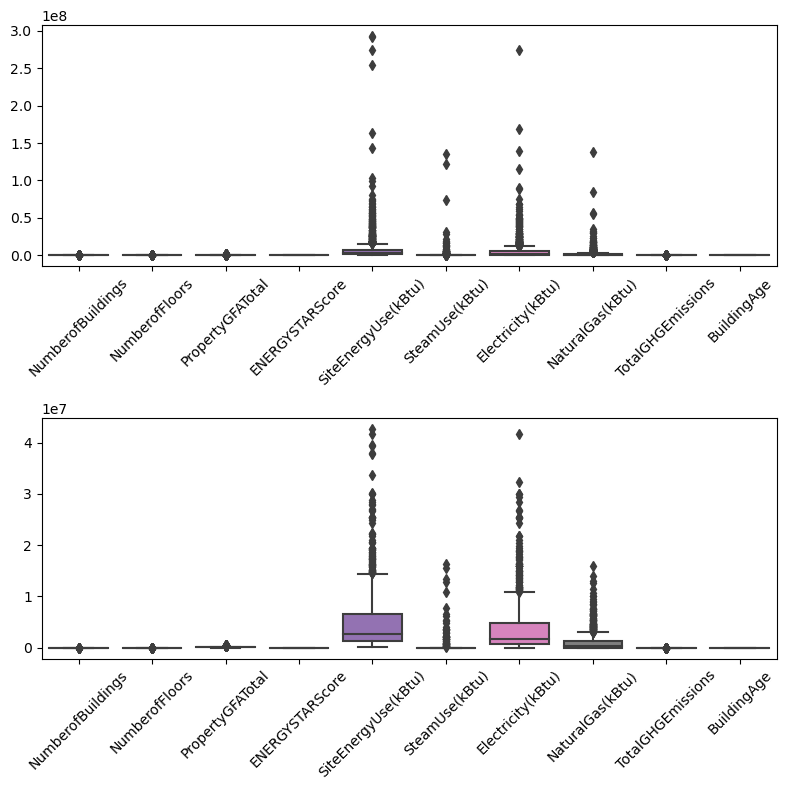

In [25]:
fig, axs = plt.subplots(2, figsize = (8,8))

plt1=sns.boxplot(df1,ax = axs[0])
plt2=sns.boxplot(df2 ,ax = axs[1])
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=45)
plt2.set_xticklabels(plt2.get_xticklabels(), rotation=45)
plt.tight_layout()

In [26]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
NumberofBuildings,917.0,9.781897e-01,1.670571e-01,0.00000,1.00,1.00,1.00,2.00
NumberofFloors,917.0,3.826609e+00,3.910493e+00,0.00000,1.00,3.00,5.00,24.00
PropertyGFATotal,917.0,9.079786e+04,9.810234e+04,16300.00000,30408.00,50499.00,104786.00,571329.00
ENERGYSTARScore,917.0,6.312105e+01,2.881608e+01,1.00000,43.00,70.00,88.00,100.00
SiteEnergyUse(kBtu),917.0,5.076934e+06,6.275974e+06,79711.79688,1215156.25,2602213.75,6486377.50,42709624.00
SteamUse(kBtu),917.0,1.951687e+05,1.204274e+06,0.00000,0.00,0.00,0.00,16284570.00
Electricity(kBtu),917.0,3.764593e+06,5.068977e+06,6138.00000,747998.00,1760118.00,4788414.00,41680634.00
NaturalGas(kBtu),917.0,1.096093e+06,1.905668e+06,0.00000,0.00,369797.00,1216359.00,15927728.00
TotalGHGEmissions,917.0,9.952263e+01,1.517690e+02,0.81000,19.14,45.33,119.03,1510.85
BuildingAge,917.0,6.113740e+01,3.201011e+01,8.00000,36.00,57.00,92.00,123.00


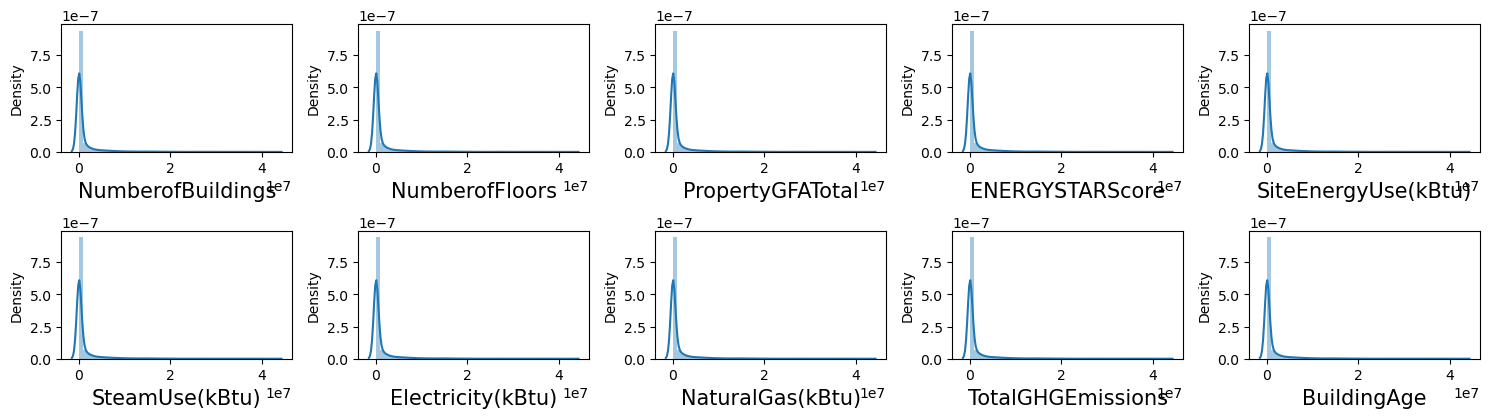

In [27]:
Z= df2.select_dtypes(include='number')
plt.figure(figsize = (15, 10))
plotnumber = 1

for column in Z:
    if plotnumber <= 30:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(Z)
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [28]:
df2.skew()

NumberofBuildings     -4.298649
NumberofFloors         2.588605
PropertyGFATotal       2.341621
ENERGYSTARScore       -0.655018
SiteEnergyUse(kBtu)    2.537234
SteamUse(kBtu)         9.363072
Electricity(kBtu)      2.752082
NaturalGas(kBtu)       3.217229
TotalGHGEmissions      4.009001
BuildingAge            0.345904
dtype: float64

· Si l'asymétrie est comprise entre -0,5 et 0,5, les données sont assez symétriques

· Si l'asymétrie est comprise entre -1 et -0,5 ou entre 0,5 et 1, les données sont modérément asymétriques

· Si l'asymétrie est inférieure à -1 ou supérieure à 1, les données sont fortement asymétriques


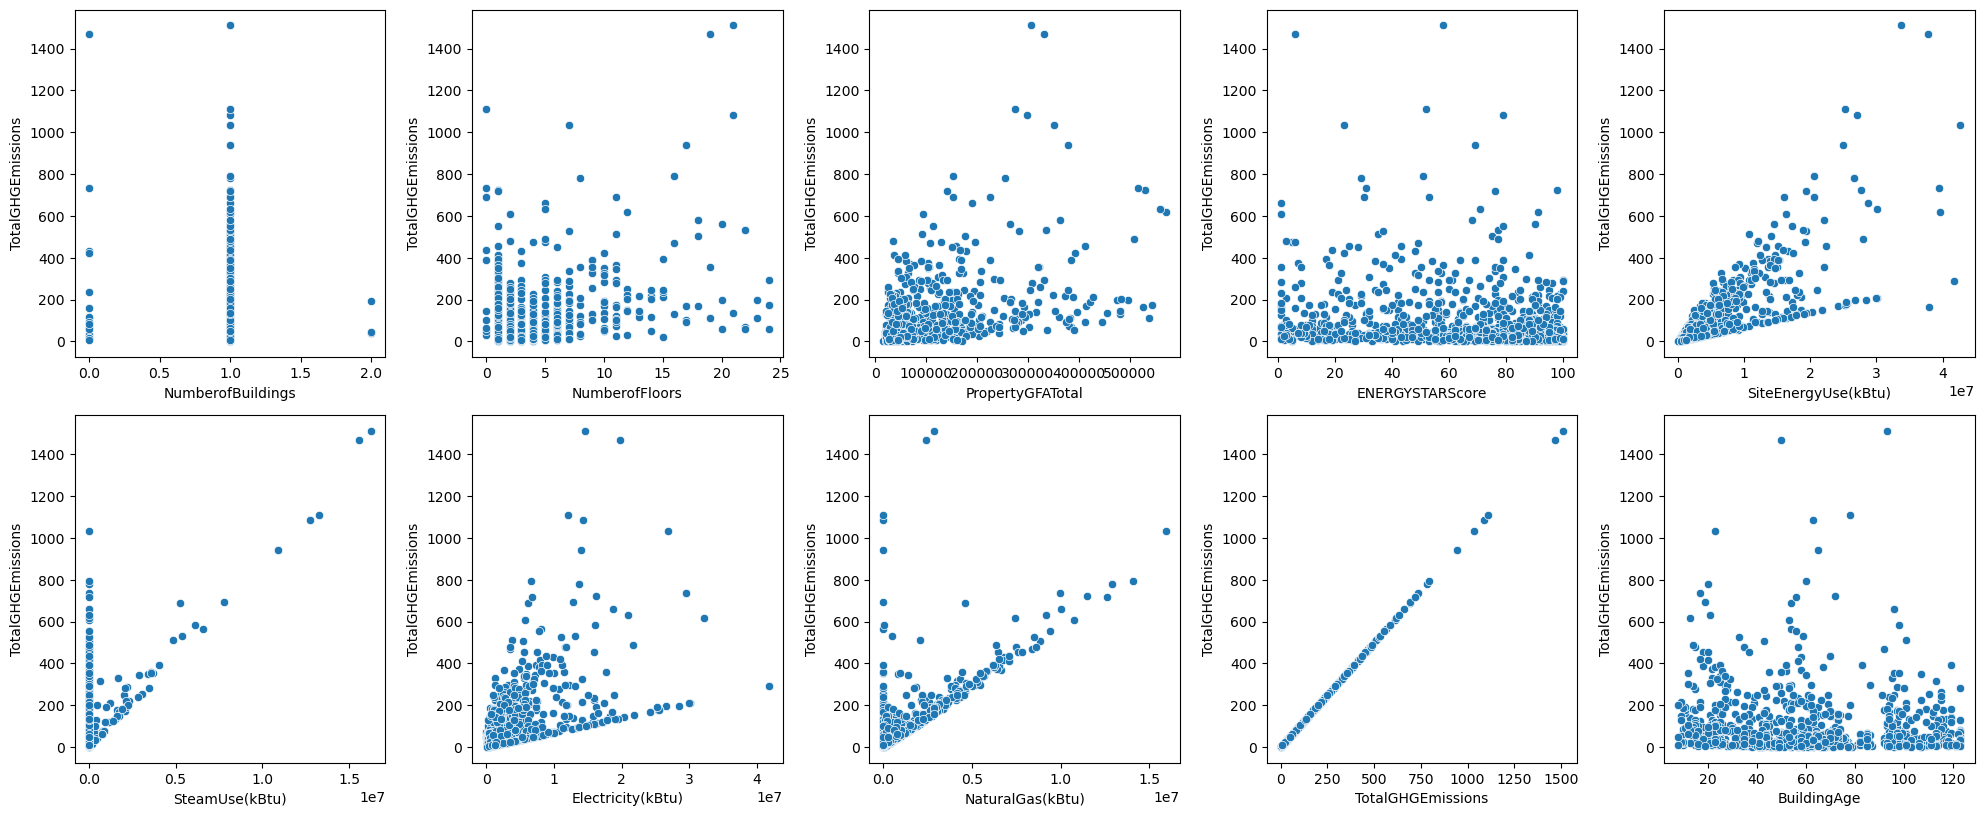

In [29]:
plt.figure(figsize = (20, 20))
plotnumber = 1

for column in Z:
    if plotnumber <= 20:
        ax = plt.subplot(5, 5, plotnumber)
        sns.scatterplot(x = Z[column], y = Z['TotalGHGEmissions'])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

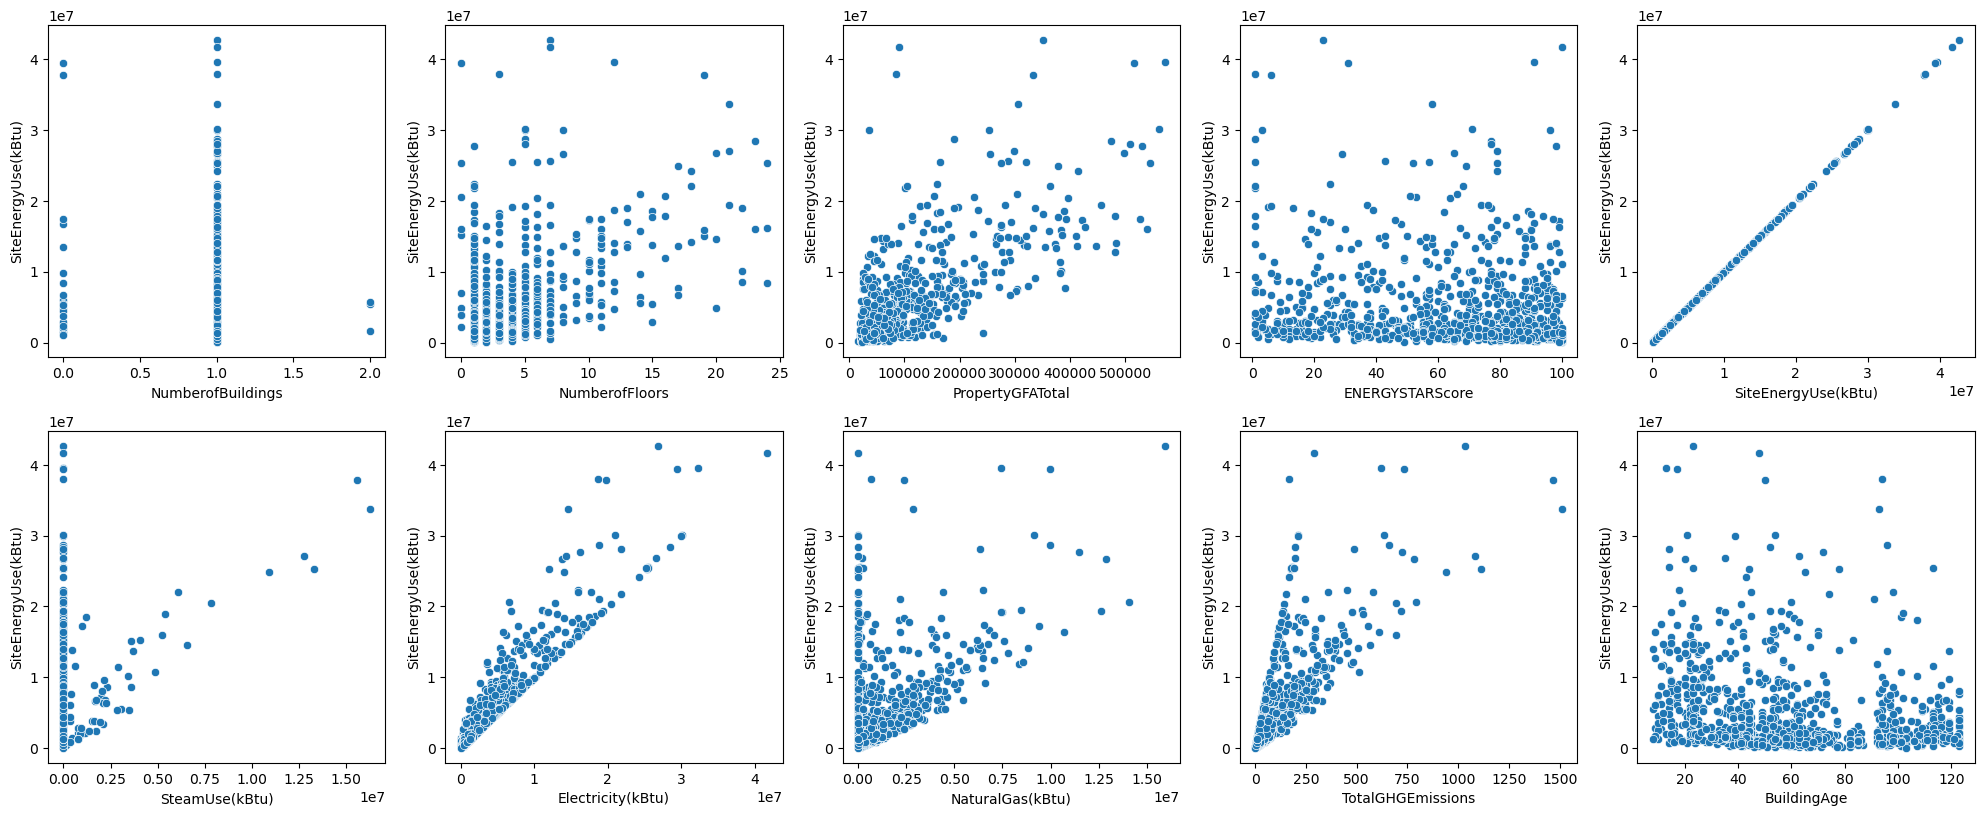

In [30]:
plt.figure(figsize = (20, 20))
plotnumber = 1

for column in Z:
    if plotnumber <= 20:
        ax = plt.subplot(5, 5, plotnumber)
        sns.scatterplot(x = Z[column], y = Z['SiteEnergyUse(kBtu)'])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

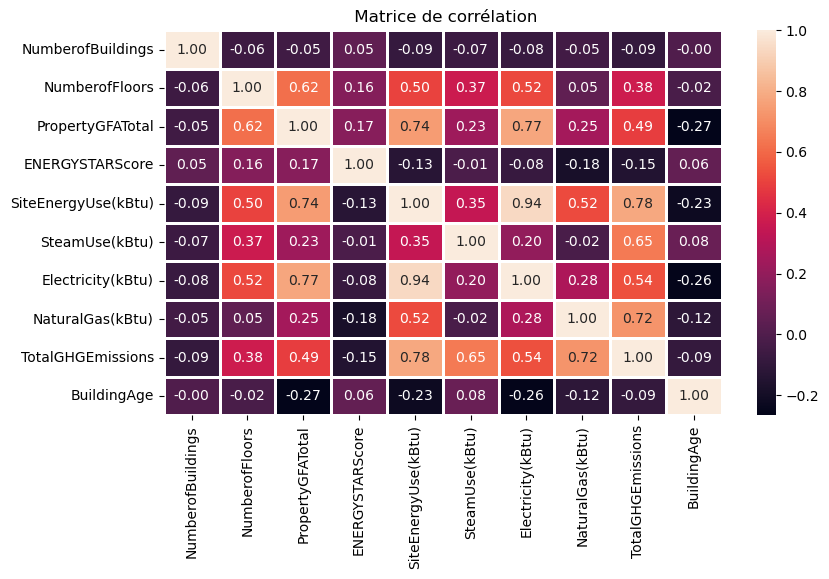

In [31]:
plt.figure(figsize=(9,5)) 
sns.heatmap(df2.corr(),annot = True, fmt = '1.2f', annot_kws = {'size' : 10}, linewidth = 1) 
plt.title(' Matrice de corrélation')
plt.show()

In [32]:
df2.corr()['SiteEnergyUse(kBtu)'].sort_values(ascending=False)

SiteEnergyUse(kBtu)    1.000000
Electricity(kBtu)      0.938903
TotalGHGEmissions      0.777960
PropertyGFATotal       0.744232
NaturalGas(kBtu)       0.521260
NumberofFloors         0.501286
SteamUse(kBtu)         0.345701
NumberofBuildings     -0.086638
ENERGYSTARScore       -0.129275
BuildingAge           -0.225908
Name: SiteEnergyUse(kBtu), dtype: float64

In [33]:
df2.corr()['TotalGHGEmissions'].sort_values(ascending=False)

TotalGHGEmissions      1.000000
SiteEnergyUse(kBtu)    0.777960
NaturalGas(kBtu)       0.718834
SteamUse(kBtu)         0.645505
Electricity(kBtu)      0.538025
PropertyGFATotal       0.486576
NumberofFloors         0.375777
NumberofBuildings     -0.088876
BuildingAge           -0.090730
ENERGYSTARScore       -0.149251
Name: TotalGHGEmissions, dtype: float64

**Calcul du facteur d'inflation de la variance (VIF)** 

La règle générale est qu'un VIF > 10 indique une multicolinéarité.

In [34]:
def compter_vif(features):
    
    W = df2[features]

    W['intercept'] = 1
 
    vif = pd.DataFrame()
    vif["Variable"] = W.columns
    vif["VIF"] = [variance_inflation_factor(W.values, i) for i in range(W.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [35]:
VIF_features=['ENERGYSTARScore','SteamUse(kBtu)','TotalGHGEmissions','NaturalGas(kBtu)' ,'SiteEnergyUse(kBtu)', 'Electricity(kBtu)','PropertyGFATotal','NumberofFloors','BuildingAge' , 'NumberofBuildings']
compter_vif(VIF_features).sort_values('VIF', ascending=False)

,Variable,VIF
2,TotalGHGEmissions,2.683570e+09
3,NaturalGas(kBtu),1.193406e+09
1,SteamUse(kBtu),1.006680e+09
5,Electricity(kBtu),1.454754e+08
4,SiteEnergyUse(kBtu),1.061003e+02
6,PropertyGFATotal,3.494984e+00
7,NumberofFloors,1.871410e+00
0,ENERGYSTARScore,1.231151e+00
8,BuildingAge,1.148200e+00
9,NumberofBuildings,1.011828e+00


In [36]:
VIF_features.remove('NaturalGas(kBtu)')
compter_vif(VIF_features).sort_values('VIF', ascending=False)

,Variable,VIF
3,SiteEnergyUse(kBtu),105.742311
4,Electricity(kBtu),59.000358
2,TotalGHGEmissions,23.930452
5,PropertyGFATotal,3.487530
1,SteamUse(kBtu),2.782634
6,NumberofFloors,1.871391
0,ENERGYSTARScore,1.230155
7,BuildingAge,1.147771
8,NumberofBuildings,1.011810


In [37]:
VIF_features.remove('Electricity(kBtu)')
compter_vif(VIF_features).sort_values('VIF', ascending=False)

,Variable,VIF
3,SiteEnergyUse(kBtu),5.563637
2,TotalGHGEmissions,4.671719
4,PropertyGFATotal,3.346985
1,SteamUse(kBtu),2.169238
5,NumberofFloors,1.863716
0,ENERGYSTARScore,1.229199
6,BuildingAge,1.141960
7,NumberofBuildings,1.011217


In [38]:
df2=df2.drop(['Electricity(kBtu)', 'NaturalGas(kBtu)' ], axis=1)
df2

,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),TotalGHGEmissions,BuildingAge
0,NonResidential,Hotel,DOWNTOWN,1.0,12,88434,60.0,7226362.50,2003882.00,249.98,96
1,NonResidential,Hotel,DOWNTOWN,1.0,11,103566,61.0,8387933.00,0.00,295.86,27
3,NonResidential,Hotel,DOWNTOWN,1.0,10,61320,56.0,6794584.00,2214446.25,286.43,97
4,NonResidential,Hotel,DOWNTOWN,1.0,18,175580,75.0,14172606.00,0.00,505.01,43
6,NonResidential,Hotel,DOWNTOWN,1.0,11,83008,27.0,5758795.00,0.00,176.14,97
...,...,...,...,...,...,...,...,...,...,...,...
3324,NonResidential,Large Office,LAKE UNION,1.0,12,483397,98.0,13998638.00,0.00,202.12,8
3337,NonResidential,Hotel,LAKE UNION,1.0,4,126823,72.0,6042399.50,0.00,131.02,9
3338,NonResidential,Warehouse,GREATER DUWAMISH,1.0,1,52085,37.0,3605855.50,0.00,157.70,68
3339,NonResidential,Small- and Mid-Sized Office,GREATER DUWAMISH,1.0,2,24990,9.0,4420650.50,0.00,134.80,94


In [39]:
objList = df2.select_dtypes(include = "object").columns
label_encoder = LabelEncoder()
for i in objList:
    df2[i] = label_encoder.fit_transform(df2[i].astype(str))

print (df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 3347
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BuildingType         917 non-null    int32  
 1   PrimaryPropertyType  917 non-null    int32  
 2   Neighborhood         917 non-null    int32  
 3   NumberofBuildings    917 non-null    float64
 4   NumberofFloors       917 non-null    int64  
 5   PropertyGFATotal     917 non-null    int64  
 6   ENERGYSTARScore      917 non-null    float64
 7   SiteEnergyUse(kBtu)  917 non-null    float64
 8   SteamUse(kBtu)       917 non-null    float64
 9   TotalGHGEmissions    917 non-null    float64
 10  BuildingAge          917 non-null    int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 75.2 KB
None


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [41]:
df_scaler = scaler.fit_transform(df2)
df_scaler

array([[0.        , 0.125     , 0.25      , ..., 0.12305403, 0.16500887,
        0.76521739],
       [0.        , 0.125     , 0.25      , ..., 0.        , 0.19539218,
        0.16521739],
       [0.        , 0.125     , 0.25      , ..., 0.13598432, 0.18914731,
        0.77391304],
       ...,
       [0.        , 0.9375    , 0.41666667, ..., 0.        , 0.10389791,
        0.52173913],
       [0.        , 0.8125    , 0.41666667, ..., 0.        , 0.08873275,
        0.74782609],
       [0.        , 0.1875    , 0.41666667, ..., 0.        , 0.00558263,
        0.        ]])

In [42]:
df_scaler=pd.DataFrame(df_scaler, columns=df2.columns)
df_scaler

,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),TotalGHGEmissions,BuildingAge
0,0.0,0.1250,0.250000,0.5,0.500000,0.129964,0.595960,0.167644,0.123054,0.165009,0.765217
1,0.0,0.1250,0.250000,0.5,0.458333,0.157228,0.606061,0.194892,0.000000,0.195392,0.165217
2,0.0,0.1250,0.250000,0.5,0.416667,0.081113,0.555556,0.157516,0.135984,0.189147,0.773913
3,0.0,0.1250,0.250000,0.5,0.750000,0.286976,0.747475,0.330587,0.000000,0.333898,0.304348
4,0.0,0.1250,0.250000,0.5,0.458333,0.120188,0.262626,0.133218,0.000000,0.116110,0.773913
...,...,...,...,...,...,...,...,...,...,...,...
912,0.0,0.2500,0.500000,0.5,0.500000,0.841572,0.979798,0.326506,0.000000,0.133314,0.000000
913,0.0,0.1250,0.500000,0.5,0.166667,0.199130,0.717172,0.139871,0.000000,0.086230,0.008696
914,0.0,0.9375,0.416667,0.5,0.041667,0.064474,0.363636,0.082715,0.000000,0.103898,0.521739
915,0.0,0.8125,0.416667,0.5,0.083333,0.015657,0.080808,0.101828,0.000000,0.088733,0.747826


In [43]:
df_scaler.to_csv(r'C:\Users\Z9220403\Desktop\P4-test-exploitaion\my_df.csv', index=False)